In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa


In [52]:

def spectrogram(waveform, size_frame, size_shift):
  spectrogram = []
  hamming_window = np.hamming(size_frame)

  for i in np.arange(0, len(waveform) - size_frame, size_shift):
    idx = int(i)
    x_frame = waveform[idx: idx + size_frame]

    # 窓掛けしたデータをFFT
    fft_spec = np.fft.rfft(x_frame * hamming_window)

    # 振幅スペクトルを対数化
    fft_log_abs_spec = np.log(np.abs(fft_spec))

    # 配列に保存
    spectrogram.append(fft_log_abs_spec)
  return spectrogram

def dyhu(y, h, u):
  diff = y - np.matmul(h, u)
  distance = 0
  for row in diff:
    for v in row:
      distance += v ** 2
  return distance

def updated_h(y, h, u):
  yu = np.matmul(y, u.T)
  uhu = np.matmul(np.matmul(h, u), u.T)
  for nk in range(len(h)):
    for ki in range(len(h[0])):
      h[nk][ki] = h[nk][ki] * (yu[nk][ki] / uhu[nk][ki])
  return h
      
def updated_u(y, h, u):
  yh = np.matmul(h.T, y)
  hhu = np.matmul(h.T, np.matmul(h, u))
  for ki in range(len(u)):
    for nk in range(len(u[0])):
      u[ki][nk] = u[ki][nk] * (yh[ki][nk] / hhu[ki][nk])
  return u

def learn(y, init_h, init_u):
  h = init_h
  u = init_u
  diffs = []
  for i in range(100):
    h = updated_h(y, h, u)
    u = updated_u(y, h, u)
    diffs.append(dyhu(y, h, u))
  plt.show(diffs)
  return h, u

SR = 16000
SIZE_FRAME = 2048
SHIFT_SIZE = 16000 / 100  # 10 msec
# https://www.youtube.com/watch?v=Ci_zad39Uhw
x, _ = librosa.load('audio/shs-test-man.wav', sr=SR)

Y = spectrogram(x, SIZE_FRAME, SHIFT_SIZE)
Y = np.exp(Y)
Y = np.array(Y).T
K = 5
H = np.random.rand(len(Y), K)
U = np.random.rand(K, len(Y[0]))
learn(Y, H, U)

(array([[0.00348471, 0.01009243, 0.0066675 , ..., 0.01633183, 0.00846013,
         0.01241205],
        [0.01663861, 0.01022636, 0.01303428, ..., 0.01073804, 0.01042414,
         0.00457426],
        [0.00592907, 0.01083776, 0.04640574, ..., 0.0171391 , 0.01129501,
         0.00211808],
        ...,
        [0.001171  , 0.00083771, 0.0003761 , ..., 0.00082712, 0.0008367 ,
         0.00010628],
        [0.00117107, 0.00083774, 0.00037604, ..., 0.00082682, 0.00083624,
         0.00011164],
        [0.00117118, 0.00083776, 0.00037609, ..., 0.000827  , 0.00083652,
         0.00010771]]),
 array([[9.13619099e-01, 9.06576159e-01, 8.12451458e-01, ...,
         2.21847662e-10, 1.03489903e-10, 1.70210193e-10],
        [3.70852104e-02, 5.23471045e-04, 1.95802094e-07, ...,
         5.35822926e-04, 5.51634061e-04, 5.29361802e-04],
        [4.16198388e-03, 2.10195889e-02, 1.38454987e-02, ...,
         1.89444978e-04, 1.61663832e-04, 1.31737187e-04],
        ...,
        [4.61544933e-05, 1.64253894e

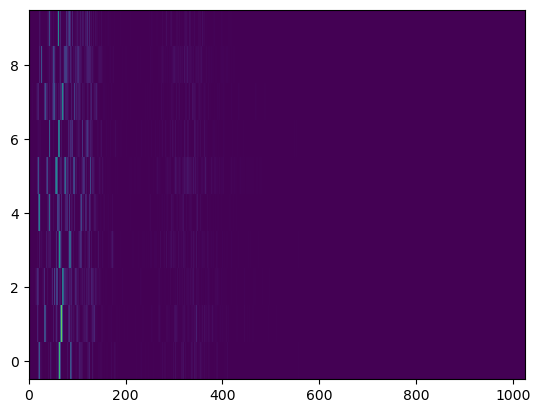

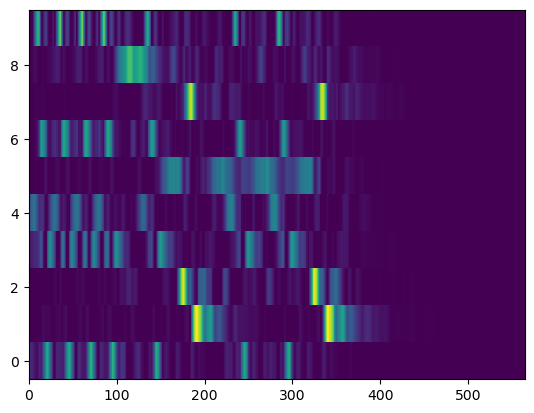

In [53]:

fig = plt.figure()
plt.imshow(H.T, aspect='auto', interpolation='nearest', origin='lower')
plt.show()
fig.savefig(f'plot/nmf/h_{K}.png')

fig = plt.figure()
plt.imshow(U, aspect='auto', interpolation='nearest', origin='lower')
plt.show()
fig.savefig(f'plot/nmf/u_{K}.png')

/Users/ansai/miniconda3/envs/exp4-audio/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


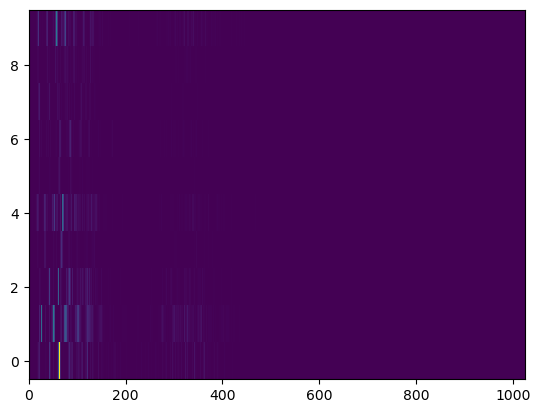

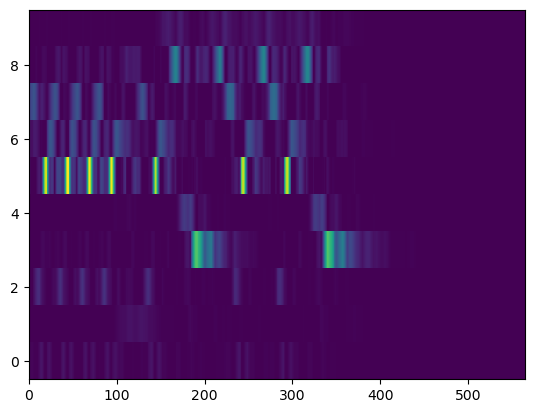

In [46]:
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)
W = model.fit_transform(Y)
H = model.components_
plt.imshow(W.T, aspect='auto', interpolation='nearest', origin='lower')
plt.show()
plt.imshow(H, aspect='auto', interpolation='nearest', origin='lower')
plt.show()
